In [2]:
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt
import numpy as np
from bokeh.plotting import figure

In [3]:
path = r"C:\Users\Giorgio\Documents\Data Science\ADM\HW2\Data"

pl = pd.read_json(path + "\Matches\matches_England.json")
df = pd.DataFrame(pl, columns = ['gameweek','label'])
# print(df)
df.sort_values(by = ['gameweek'], inplace = True)
df.reset_index(drop = True, inplace = True)
df

gameweek                                              label
0           1                    Arsenal - Leicester City, 4 - 3
1           1         Manchester United - West Ham United, 4 - 0
2           1        Newcastle United - Tottenham Hotspur, 0 - 2
3           1    Brighton & Hove Albion - Manchester City, 0 - 2
4           1                           Chelsea - Burnley, 2 - 3
5           1                         Watford - Liverpool, 3 - 3
6           1                        Everton - Stoke City, 1 - 0
7           1                  Southampton - Swansea City, 0 - 0
8           1      West Bromwich Albion - AFC Bournemouth, 1 - 0
9           1          Crystal Palace - Huddersfield Town, 0 - 3
10          2                   Manchester City - Everton, 1 - 1
11          2                 Tottenham Hotspur - Chelsea, 1 - 2
12          2        Huddersfield Town - Newcastle United, 1 - 0
13          2                        Stoke City - Arsenal, 1 - 0
14          2                   AFC Bournemouth - Watford, 0 - 2
15          2              Burnley - West Bromwich Albion, 0 - 1
16          2     Leicester City - Brighton & Hove Albion, 2 - 0
17          2                  Liverpool - Crystal Palace, 1 - 0
18          2               Southampton - West Ham United, 3 - 2
19          2            Swansea City - Manchester United, 0 - 4
20          3                         Liverpool - Arsenal, 4 - 0
21          3                 Tottenham Hotspur - Burnley, 1 - 1
22          3                           Chelsea - Everton, 2 - 0
23          3           West Bromwich Albion - Stoke City, 1 - 1
24          3           AFC Bournemouth - Manchester City, 1 - 2
25          3               Crystal Palace - Swansea City, 0 - 2
26          3             Huddersfield Town - Southampton, 0 - 0
27          3          Newcastle United - West Ham United, 3 - 0
28          3            Watford - Brighton & Hove Albion, 0 - 0
29          3          Manchester United - Leicester City, 2 - 0
..        ...                                                ...
350        36                 Tottenham Hotspur - Watford, 2 - 0
351        36                 Huddersfield Town - Everton, 0 - 2
352        36           West Ham United - Manchester City, 1 - 4
353        36                      Swansea City - Chelsea, 0 - 1
354        36            Burnley - Brighton & Hove Albion, 0 - 0
355        36             Crystal Palace - Leicester City, 5 - 0
356        36     Newcastle United - West Bromwich Albion, 0 - 1
357        36               Southampton - AFC Bournemouth, 2 - 1
358        36                      Liverpool - Stoke City, 0 - 0
359        36                 Manchester United - Arsenal, 2 - 1
360        37                           Arsenal - Burnley, 5 - 0
361        37    West Bromwich Albion - Tottenham Hotspur, 1 - 0
362        37         Manchester City - Huddersfield Town, 0 - 0
363        37                       Everton - Southampton, 1 - 1
364        37              AFC Bournemouth - Swansea City, 1 - 0
365        37            Leicester City - West Ham United, 0 - 2
366        37                  Watford - Newcastle United, 2 - 1
367        37                 Stoke City - Crystal Palace, 1 - 2
368        37  Brighton & Hove Albion - Manchester United, 1 - 0
369        37                         Chelsea - Liverpool, 1 - 0
370        38       Crystal Palace - West Bromwich Albion, 2 - 0
371        38                 Huddersfield Town - Arsenal, 0 - 1
372        38          Liverpool - Brighton & Hove Albion, 4 - 0
373        38                 Manchester United - Watford, 1 - 0
374        38          Tottenham Hotspur - Leicester City, 5 - 4
375        38               Southampton - Manchester City, 0 - 1
376        38                   Swansea City - Stoke City, 1 - 2
377        38                   West Ham United - Everton, 3 - 1
378        38                  Newcastle United - Chelsea, 3 - 0
379        38                   Burnley 

In [4]:
df['team1'] = ''
df['team2'] = ''
df['score1'] = 0
df['score2'] = 0

In [5]:
for i in range(len(df)):
    df['team1'][i] = ((df['label'][i].replace(',', '-')).split('-'))[0].strip()
    df['team2'][i] = ((df['label'][i].replace(',', '-')).split('-'))[1].strip()
    p1 = ((df['label'][i].replace(',', '-')).split('-'))[2].strip()
    p2 = ((df['label'][i].replace(',', '-')).split('-'))[3].strip()
    if(int(p1) > int(p2)):
        df['score1'][i] +=  3
    elif(int(p1) == int(p2)):
        df['score1'][i] += 1
        df['score2'][i] += 1
    else:
        df['score2'][i] += 3


C:\Users\Giorgio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Giorgio\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Giorgio\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Giorgio\Anaconda3\lib\site-packages\ipyke

In [6]:
df.iloc[[1]]

gameweek                                       label              team1  \
1         1  Manchester United - West Ham United, 4 - 0  Manchester United   

             team2  score1  score2  
1  West Ham United       3       0

In [7]:
ars = pd.DataFrame(columns = ['gameweek', 'label', 'team1', 'team2', 'score1', 'score2'])
for i in range(len(df)):
    if bool(df.team1[i] == 'Arsenal' or df.team2[i] == 'Arsenal'):
        ars = ars.append(df.iloc[[i]])
ars

gameweek                                    label                   team1  \
0          1          Arsenal - Leicester City, 4 - 3                 Arsenal   
13         2              Stoke City - Arsenal, 1 - 0              Stoke City   
20         3               Liverpool - Arsenal, 4 - 0               Liverpool   
39         4         Arsenal - AFC Bournemouth, 3 - 0                 Arsenal   
41         5                 Chelsea - Arsenal, 0 - 0                 Chelsea   
51         6    Arsenal - West Bromwich Albion, 2 - 0                 Arsenal   
66         7  Arsenal - Brighton & Hove Albion, 2 - 0                 Arsenal   
70         8                 Watford - Arsenal, 2 - 1                 Watford   
81         9                 Everton - Arsenal, 2 - 5                 Everton   
94        10            Arsenal - Swansea City, 2 - 1                 Arsenal   
102       11         Manchester City - Arsenal, 3 - 1         Manchester City   
118       12       Arsenal - Tottenham Hotspur, 2 - 0                 Arsenal   
121       13                 Burnley - Arsenal, 0 - 1                 Burnley   
139       14       Arsenal - Huddersfield Town, 5 - 0                 Arsenal   
142       15       Arsenal - Manchester United, 1 - 3                 Arsenal   
152       16             Southampton - Arsenal, 1 - 1             Southampton   
160       17         West Ham United - Arsenal, 0 - 0         West Ham United   
179       18        Arsenal - Newcastle United, 1 - 0                 Arsenal   
180       19               Arsenal - Liverpool, 3 - 3                 Arsenal   
198       20          Crystal Palace - Arsenal, 2 - 3          Crystal Palace   
201       21    West Bromwich Albion - Arsenal, 1 - 1    West Bromwich Albion   
211       22                 Arsenal - Chelsea, 2 - 2                 Arsenal   
227       23         AFC Bournemouth - Arsenal, 2 - 1         AFC Bournemouth   
231       24          Arsenal - Crystal Palace, 4 - 1                 Arsenal   
248       25            Swansea City - Arsenal, 3 - 1            Swansea City   
253       26                 Arsenal - Everton, 5 - 1                 Arsenal   
264       27       Tottenham Hotspur - Arsenal, 1 - 0       Tottenham Hotspur   
270       28         Arsenal - Manchester City, 0 - 3                 Arsenal   
282       29  Brighton & Hove Albion - Arsenal, 2 - 1  Brighton & Hove Albion   
291       30                 Arsenal - Watford, 3 - 0                 Arsenal   
307       31          Leicester City - Arsenal, 3 - 1          Leicester City   
319       32              Arsenal - Stoke City, 3 - 0                 Arsenal   
321       33             Arsenal - Southampton, 3 - 2                 Arsenal   
334       34        Newcastle United - Arsenal, 2 - 1        Newcastle United   
349       35         Arsenal - West Ham United, 4 - 1                 Arsenal   
359       36       Manchester United - Arsenal, 2 - 1       Manchester United   
360       37                 Arsenal - Burnley, 5 - 0                 Arsenal   
371       38       Huddersfield Town - Arsenal, 0 - 1       Huddersfield Town   

                      team2 score1 score2  
0            Leicester City      3      0  
13                  Arsenal      3      0  
20                  Arsenal      3      0  
39          AFC Bournemouth      3      0  
41                  Arsenal      1      1  
51     West Bromwich Albion      3      0  
66   Brighton & Hove Albion      3      0  
70                  Arsenal      3      0  
81                  Arsenal      0      3  
94             Swansea City      3      0  
102                 Arsenal      3      0  
118       Tottenham Hotspur      3      0  
121                 Arsenal      0      3  
139       Huddersfield Town      3      0  
142       Manchester United      0      3  
152                 Arsenal      1      1  
160                 Arsenal      1      1  
179        Newcastle United      3      0  
180     

In [8]:
d = {}
for i in range(len(df)):
    if df.team1[i] not in d:
        d[df.team1[i]] = [int(df.score1[df.gameweek[i]-1]),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    else:
        d[df.team1[i]][df.gameweek[i]-1] += df.score1[i] + d[df.team1[i]][df.gameweek[i]-2]
    if df.team2[i] not in d:
        d[df.team2[i]] = [int(df.score2[df.gameweek[i]-1]),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    else:
        d[df.team2[i]][df.gameweek[i]-1] += df.score2[i] + d[df.team2[i]][df.gameweek[i]-2]
for elem in d:
    print(elem, d[elem])

Arsenal [3, 3, 3, 6, 7, 10, 13, 13, 16, 19, 19, 22, 25, 28, 28, 29, 30, 33, 34, 37, 38, 39, 39, 42, 42, 45, 45, 45, 45, 48, 48, 51, 54, 54, 57, 57, 60, 63]
Leicester City [0, 3, 3, 3, 4, 4, 5, 6, 9, 12, 13, 13, 14, 17, 20, 23, 26, 26, 27, 27, 27, 30, 31, 34, 34, 35, 35, 36, 37, 40, 43, 46, 46, 46, 47, 47, 47, 47]
Manchester United [3, 6, 9, 10, 13, 16, 19, 20, 20, 23, 23, 26, 29, 32, 35, 35, 38, 41, 42, 43, 44, 47, 50, 53, 53, 56, 56, 59, 62, 65, 66, 69, 72, 72, 75, 78, 78, 81]
West Ham United [0, 0, 0, 3, 4, 4, 7, 8, 8, 9, 9, 9, 10, 10, 10, 13, 14, 17, 17, 18, 19, 22, 25, 26, 27, 27, 30, 30, 30, 30, 31, 34, 35, 36, 36, 36, 39, 42]
Newcastle United [3, 3, 6, 9, 12, 12, 13, 14, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 21, 21, 22, 25, 26, 26, 27, 28, 31, 32, 32, 35, 35, 38, 41, 44, 44, 44, 44, 47]
Tottenham Hotspur [0, 0, 1, 4, 5, 8, 11, 14, 17, 17, 20, 20, 21, 21, 22, 25, 28, 28, 31, 34, 35, 38, 41, 42, 45, 46, 49, 52, 55, 58, 61, 64, 67, 67, 68, 71, 71, 74]
Brighton & Hove Albion [3, 3,

In [9]:
allsquad = pd.DataFrame(d)
allsquad.index = np.arange(1, len(allsquad)+1)
allsquad

Arsenal  Leicester City  Manchester United  West Ham United  \
1         3               0                  3                0   
2         3               3                  6                0   
3         3               3                  9                0   
4         6               3                 10                3   
5         7               4                 13                4   
6        10               4                 16                4   
7        13               5                 19                7   
8        13               6                 20                8   
9        16               9                 20                8   
10       19              12                 23                9   
11       19              13                 23                9   
12       22              13                 26                9   
13       25              14                 29               10   
14       28              17                 32               10   
15       28              20                 35               10   
16       29              23                 35               13   
17       30              26                 38               14   
18       33              26                 41               17   
19       34              27                 42               17   
20       37              27                 43               18   
21       38              27                 44               19   
22       39              30                 47               22   
23       39              31                 50               25   
24       42              34                 53               26   
25       42              34                 53               27   
26       45              35                 56               27   
27       45              35                 56               30   
28       45              36                 59               30   
29       45              37                 62               30   
30       48              40                 65               30   
31       48              43                 66               31   
32       51              46                 69               34   
33       54              46                 72               35   
34       54              46                 72               36   
35       57              47                 75               36   
36       57              47                 78               36   
37       60              47                 78               39   
38       63              47                 81               42   

    Newcastle United  Tottenham Hotspur  Brighton & Hove Albion  \
1                  3                  0                       3   
2                  3                  0                       3   
3                  6                  1                       4   
4                  9                  4                       7   
5                 12                  5                       7   
6                 12                  8                      10   
7                 13                 11                      10   
8                 14                 14                      11   
9                 17                 17                      14   
10                17                 17                      15   
11                17                 20                      18   
12                17                 20                      19   
13                17                 21                      19   
14                18                 21                      20   
15                18                 22                      20   
16                18                 25                      20   
17                18                 28                      20   
18                18                 28                      21   
19                21                 31                      24   
20                21                 34           

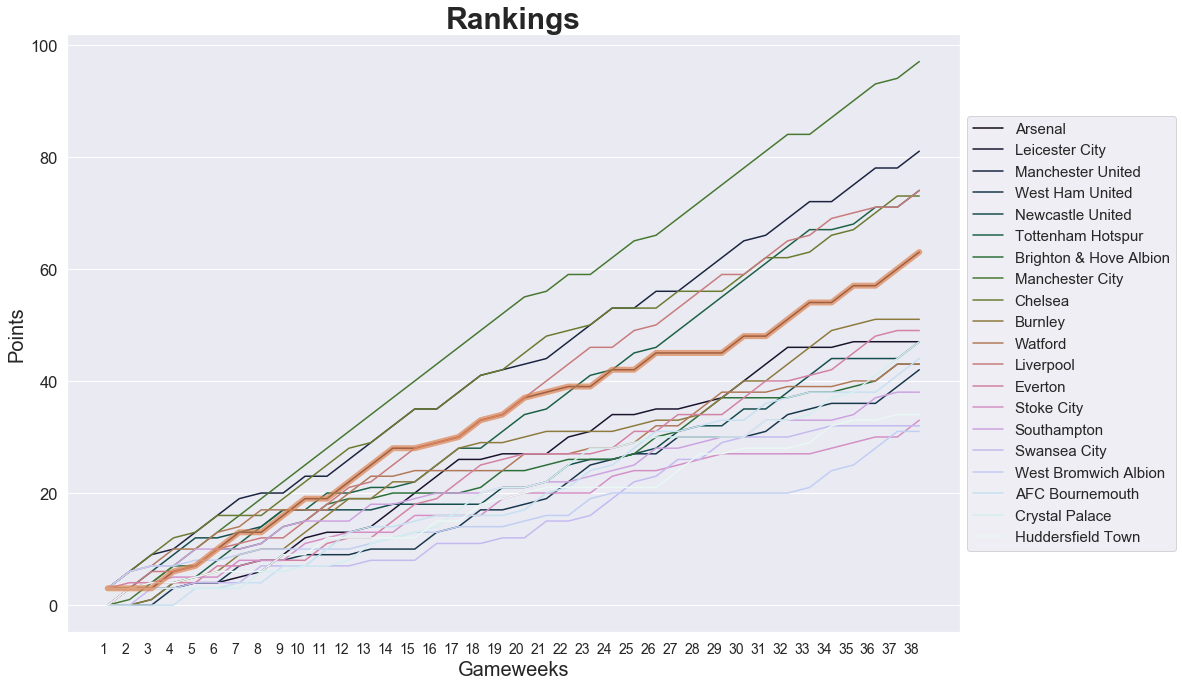

In [16]:
fig, ax = plt.subplots()
se.set(font_scale = 1.5)
fig.set_size_inches(16, 11)
ax.xaxis.grid(False)
ax.set_xticks(list(range(1, 39))) 
ax.set_xticklabels(list(range(1, 39)), fontsize = 14, horizontalalignment='right')
ax.axes.set_title("Rankings", fontsize = 30, fontweight="bold")
ax.set_xlabel("Gameweeks",fontsize = 20)
ax.set_ylabel("Points",fontsize = 20)
x = se.lineplot(data = allsquad, hue = allsquad.columns, ax = ax, legend = 'full', palette = 'cubehelix', style = 'choice', 
                dashes = False, size = 'coherence', sizes=(.25, 2.5))
x.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, fontsize = 15)
# ax.set_xticks([float(n)+0.5 for n in ax.get_xticks()])
plt.plot(allsquad['Arsenal'], marker='', linewidth=6, alpha=0.7)
plt.show(x)

# se.set()
# se.set(rc={'figure.figsize':(10, 9)})
# se.set_style('whitegrid')
# plt.figure(figsize = (5, 5))
# ax.set(xlabel='common xlabel', ylabel='common ylabel', title = )
# fig, ax = plt.subplots()
# plt.xlabel("Gameweeks", fontsize = 15)
# plt.ylabel("Points", fontsize = 15)
# plt.title("Rankings", fontsize = 20, fontweight="bold")
# ax.set_xticks(range(1,39))